# Исследование объявлений о продаже квартир

В данном проекте используются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Задача - научиться определять рыночную стоимость объектов недвижимости, а также установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
`balcony` — число балконов
`ceiling_height` — высота потолков (м)
`cityCenters_nearest` — расстояние до центра города (м)
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
`first_day_exposition` — дата публикации
`floor` — этаж
`floors_total` — всего этажей в доме
`is_apartment` — апартаменты (булев тип)
`kitchen_area` — площадь кухни в квадратных метрах (м²)
`last_price` — цена на момент снятия с публикации
`living_area` — жилая площадь в квадратных метрах (м²)
`locality_name` — название населённого пункта
`open_plan` — свободная планировка (булев тип)
`parks_around3000` — число парков в радиусе 3 км
`parks_nearest` — расстояние до ближайшего парка (м)
`ponds_around3000` — число водоёмов в радиусе 3 км
`ponds_nearest` — расстояние до ближайшего водоёма (м)
`rooms` — число комнат
`studio` — квартира-студия (булев тип)
`total_area` — общая площадь квартиры в квадратных метрах (м²)
`total_images` — число фотографий квартиры в объявлении

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Предобработка данных

Рассмотрим данные.

In [36]:
dataset = pd.read_csv('real_estate_data.csv',sep='\t')
dataset.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [37]:
display(dataset.info())
display(dataset.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

###  Теперь найдем и изучим пропуски в столбцах.


In [38]:
dataset['ceiling_height'] = dataset['ceiling_height'].fillna(dataset['ceiling_height'].median())
dataset = dataset[dataset['floors_total'].notna()]
dataset['living_area'] = dataset['living_area'].fillna(dataset['living_area'].median())
dataset['is_apartment'] = dataset['is_apartment'].fillna(False)
dataset['kitchen_area'] = dataset['kitchen_area'].fillna(dataset['kitchen_area'].median())
dataset['balcony'] = dataset['balcony'].fillna(0)
dataset['locality_name'] = dataset['locality_name'].fillna('')
dataset['parks_around3000'] = dataset['parks_around3000'].fillna(0)
dataset['ponds_around3000'] = dataset['ponds_around3000'].fillna(0)
pd.set_option('display.max_columns', 50)
display(dataset)
display(dataset.isna().sum())
display(dataset.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,False,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,9.10,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

None

**Можно заметить следующие пропущеные значения, которые можно заполнить:**
- `ceiling_height`(высота потолков) - можно заполнить медианным значением
- `floors_total`(кол-во комнат) - количество этих пропущенных значений небольшое, составляет всего 0.3% от общих данных, поэтому их можно удалить
- `livivng_area`(жилая площадь) - числовое значение, поэтому можно заполнить медианой
- `is_apartment`(явл ли апартаментами) - категориальное значение, некоторые значение заполнены true или false, поэтому пропущенные можно заполнить false
- `kitchen_area` также можно заполнить медианой
- `balcony` -имеет целые числовые значения. Некоторые ячейки имеют значение 0, значит можно заполнить пропущенные 0.
- `locality_name` можно заполнить пустой строкой
- `parks_around3000` - возможно если не указано кол-во,значит парка в радиусе 3000 нет и можно заполнить нулями.Аналогично с ponds

### Рассмотрим типы данных в каждом столбце:
Те значения, которым стоит изменить тип данных:
 - `first_day_exposition` - содержит значения времени, поэтому тип datetime
 - `floors_total` - должна содержать значения int64
 - Аналогично `parks_around3000` и `ponds_arounds3000`

In [39]:
dataset['first_day_exposition'] = pd.to_datetime(dataset['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')
dataset['floors_total'] = dataset['floors_total'].astype('int64')
dataset['floor'] = dataset['floor'].astype('int64')
dataset['parks_around3000'] = dataset['parks_around3000'].astype('int64')
dataset['ponds_around3000'] = dataset['ponds_around3000'].astype('int64')
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

None

In [40]:
dataset

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,9.10,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.

Так как начало значений locality_name имеет в самом начале неявные дубликаты, а уникальные значения только в конце, можно оставить только суть, то есть последнее слово значений столбца locality_name

In [41]:
dataset.drop_duplicates()
dataset['locality_name'].unique()
dataset['locality_name'] = dataset['locality_name'].str.split(' ').str[-1]
dataset

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2.0,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,9.10,0.0,Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


### Найдем и устраним редкие и выбивающиеся значения.

В случае с ceiling_height изменяются строки, где потолки больше 15 метров(деляться на 10). Также найден такой размер потолков как 1 метр или 11,12,13,14 метров. Можно заменить данные значения на максимум(9) или минимум(2 метра), а можно заменить на нулевое значение, чтобы не запутаться и не испортить дальнейший анализ. Также решено было назвать кол-во комнат, равное 0 и большее 12 аномальным. Выведя уникальные значения parks_nearest, можно увидеть необычо огромные значения. Поэтому решено было просто отбросить значения больше 100(не знаю насколько это правильно..).Остальные значения в норме.

In [42]:
dataset['ceiling_height'] = dataset['ceiling_height'].where(dataset['ceiling_height'] <= 15, np.round(dataset['ceiling_height']/10, 1))
dataset['rooms'] = dataset['rooms'].where(~(dataset['rooms']>12),np.nan)
dataset['rooms'] = dataset['rooms'].where(dataset['rooms']>0,np.nan)
dataset['ceiling_height'] = dataset['ceiling_height'].where((dataset['ceiling_height']>1) & (dataset['ceiling_height']<10),np.nan)
dataset['parks_nearest'] = dataset['parks_nearest'].where(dataset['parks_nearest']>100,np.nan)

Проверим на наличие выбросов

Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


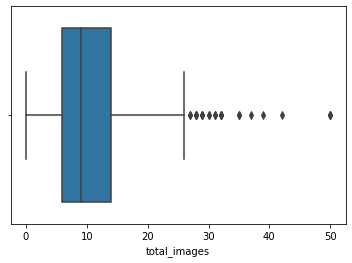

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


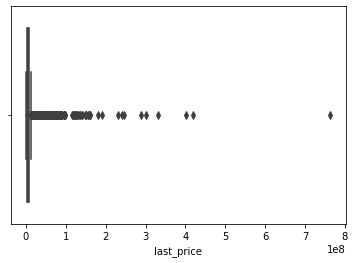

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


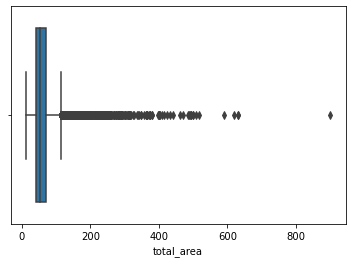

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


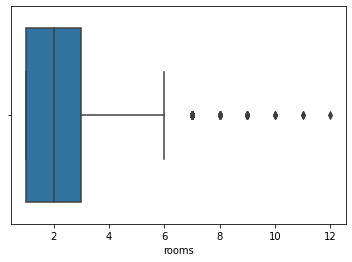

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


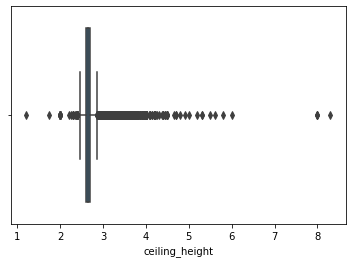

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


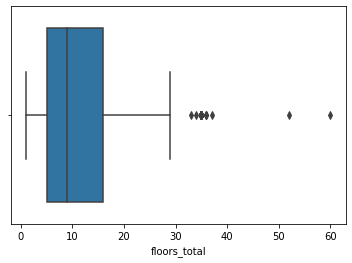

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


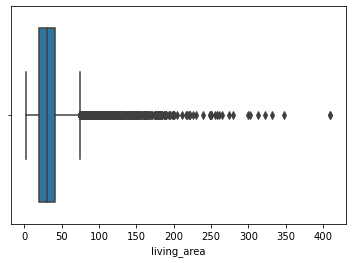

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


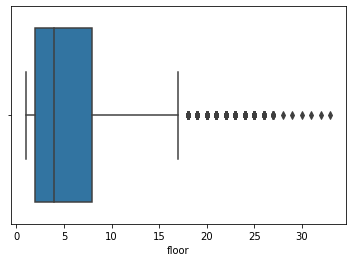

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


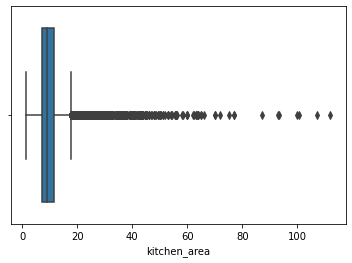

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


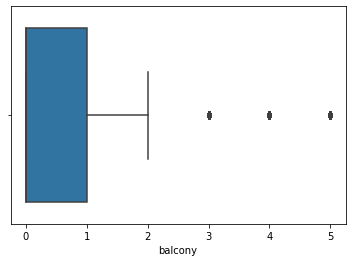

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


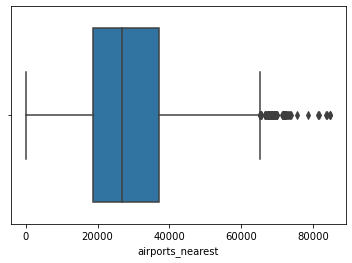

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


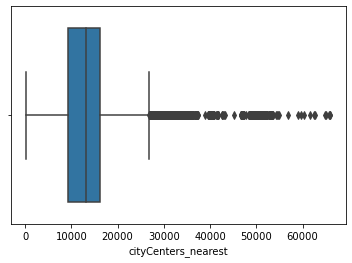

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


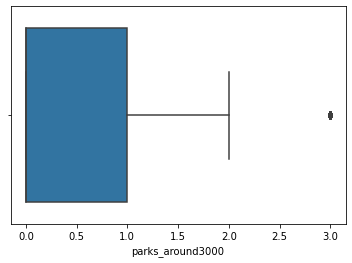

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


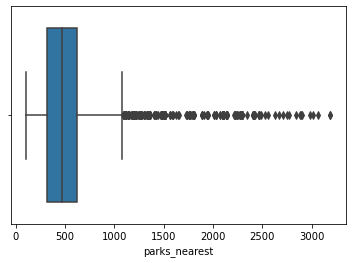

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


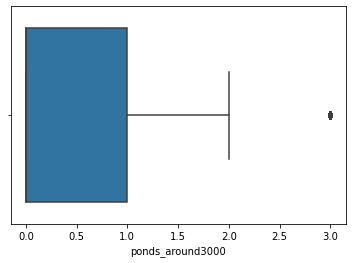

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


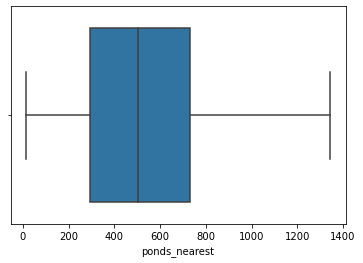

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


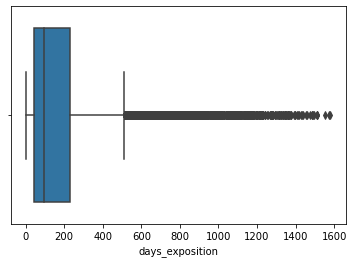

In [43]:
numeric = dataset.select_dtypes(exclude=['object','datetime64','bool']).columns
print(numeric)
def display_boxplot(column):
    sns.boxplot(dataset[column])
    plt.show()
for col in numeric:
    display_boxplot(col)

In [44]:
dataset['rooms'] = dataset['rooms'].where(~(dataset['rooms']>12),np.nan)

dataset['total_area'] = dataset['total_area'].where(~(dataset['rooms']>700),np.nan)
dataset['parks_around3000'] = dataset['parks_around3000'].where(~(dataset['parks_around3000']>2.5),np.nan)
dataset['ponds_around3000'] = dataset['ponds_around3000'].where(~(dataset['parks_around3000']>2.5),np.nan)
dataset['last_price'] = dataset['last_price'].where(~(dataset['last_price']>700000000),np.nan)


### Посчитаем и добавим в таблицу новые столбцы

In [45]:
dataset['one_price'] = dataset['last_price']/dataset['total_area']
dataset['day_of_week'] = dataset['first_day_exposition'].dt.dayofweek
dataset['month_of_exposition'] = dataset['first_day_exposition'].dt.month
dataset['year_of_exposition'] = dataset['first_day_exposition'].dt.year
dataset['type_of_floor'] = 'другое'
dataset['type_of_floor'] = dataset['type_of_floor'].where(dataset['floor']>1,'первый')
dataset['type_of_floor'] = dataset['type_of_floor'].where(dataset['floor']<dataset['floors_total'],'последний')
dataset['cityCentre_km'] = round(dataset['cityCenters_nearest']/1000)
dataset

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price,day_of_week,month_of_exposition,year_of_exposition,type_of_floor,cityCentre_km
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN,120370.370370,3,3,2019,другое,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11,18.6,1,False,False,False,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,NaN,2,574.0,558.0,92785.714286,3,8,2015,другое,14.0
3,0,64900000.0,159.00,2015-07-24,3.0,2.65,14,30.0,9,False,False,False,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,NaN,3,234.0,424.0,408176.100629,4,7,2015,другое,7.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1,48.0,121.0,100000.000000,1,6,2018,другое,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3.0,3.70,5,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3,381.0,NaN,72490.845228,1,3,2017,другое,4.0
23695,14,3100000.0,59.00,2018-01-15,3.0,2.65,5,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0,NaN,45.0,52542.372881,0,1,2018,другое,NaN
23696,18,2500000.0,56.70,2018-02-11,2.0,2.65,3,29.7,1,False,False,False,9.10,0.0,Рождествено,NaN,NaN,0.0,NaN,0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2.0,3.00,17,30.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3,196.0,602.0,149511.400651,1,3,2017,другое,10.0


### Проведем исследовательский анализ данных

### 1.Изучите следующие параметры объектов:

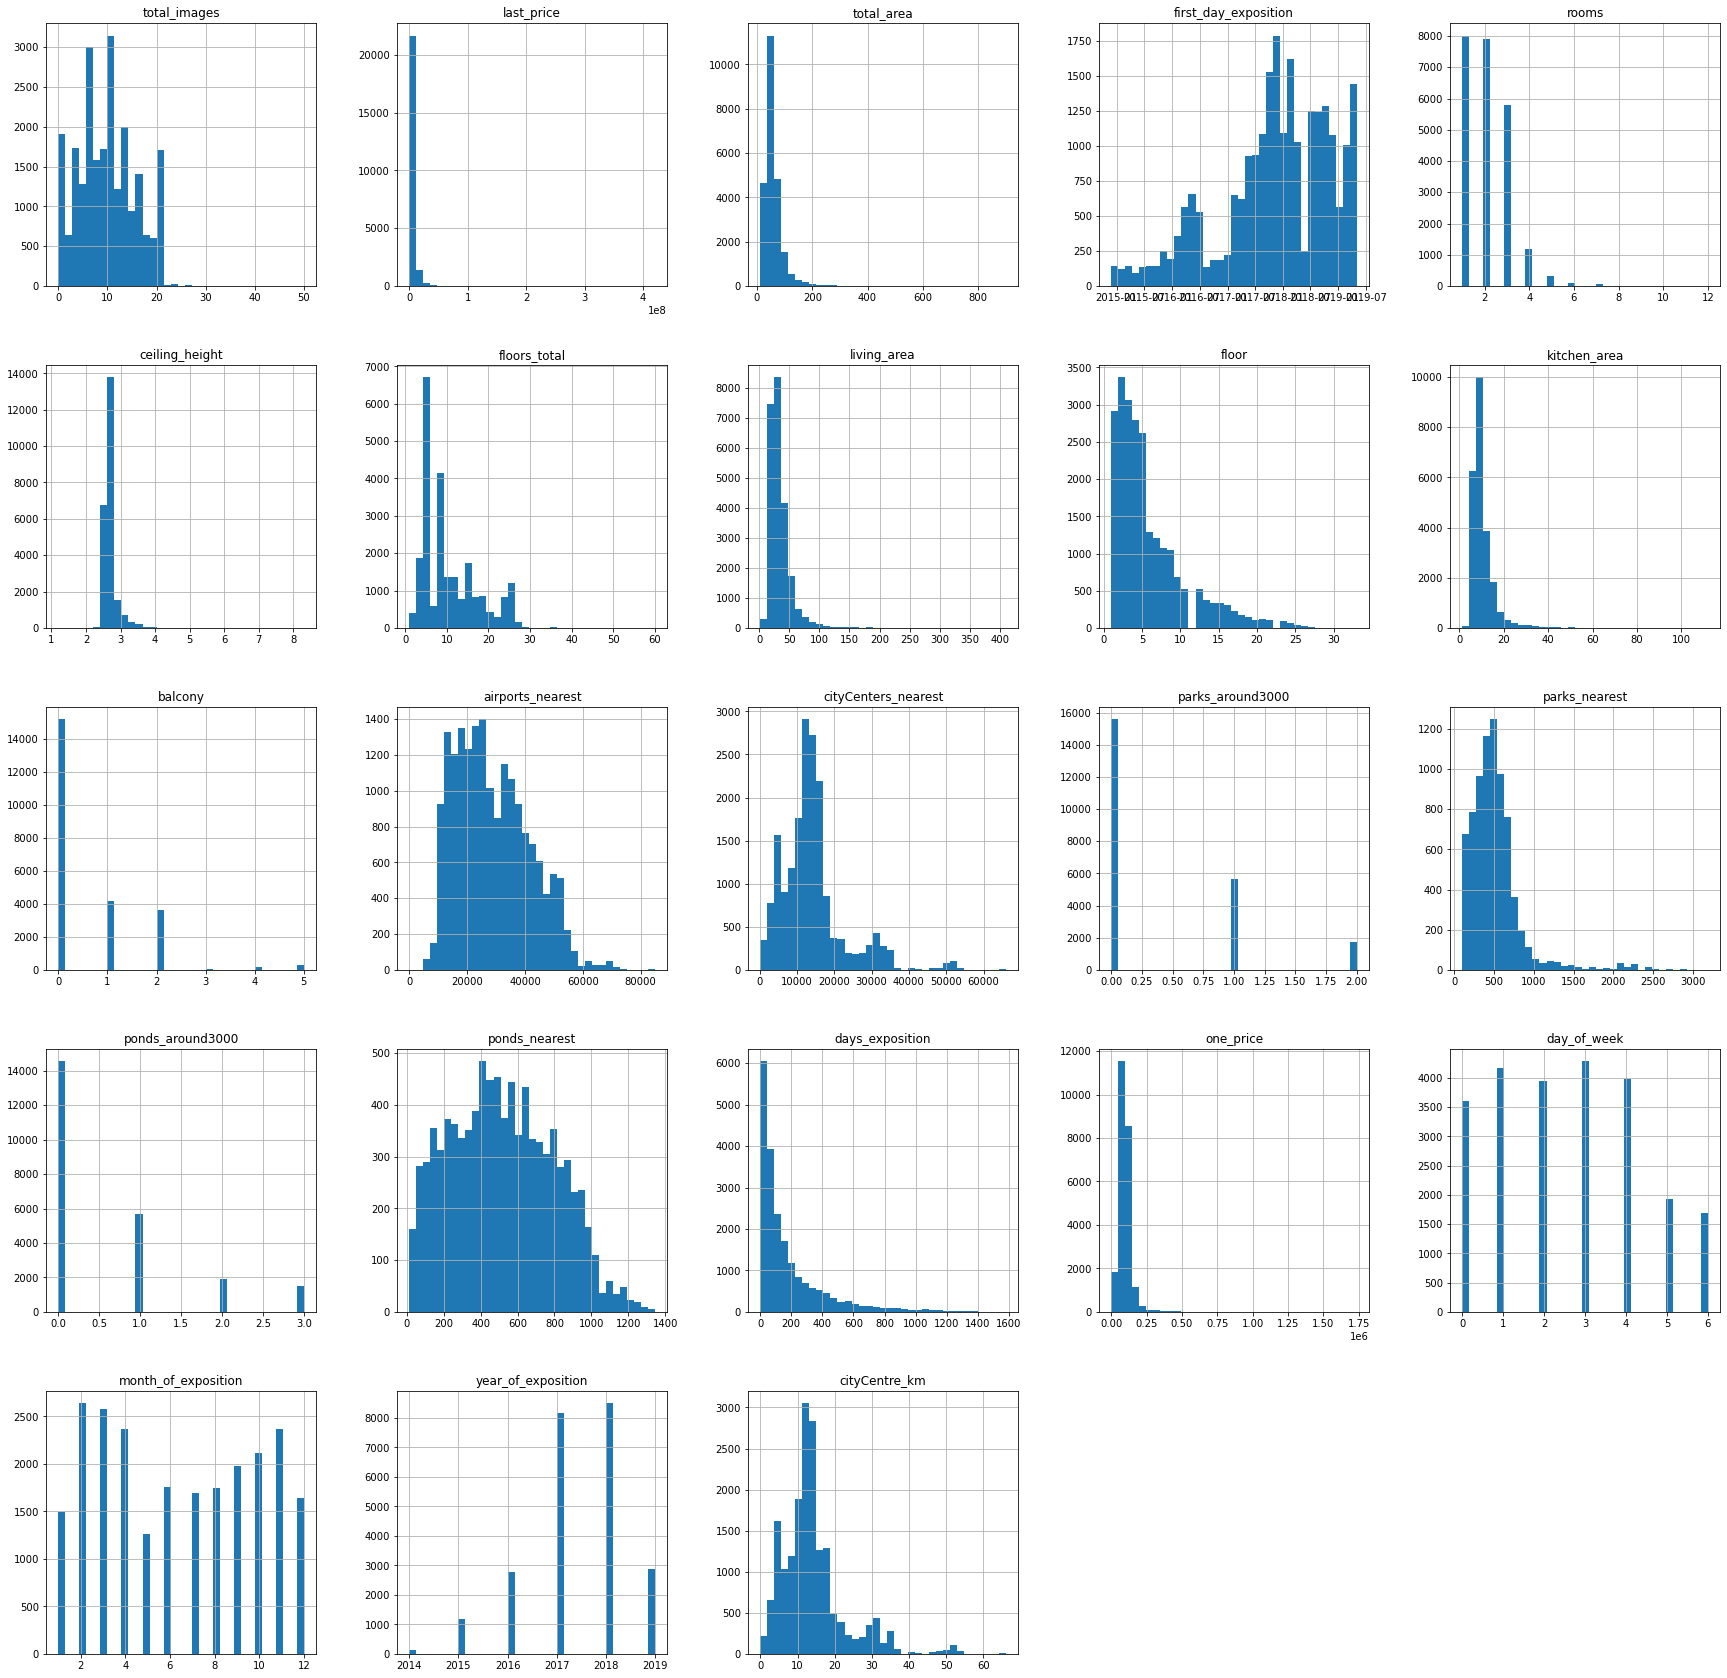

In [46]:
dataset.hist(figsize=(30,30),bins =35);


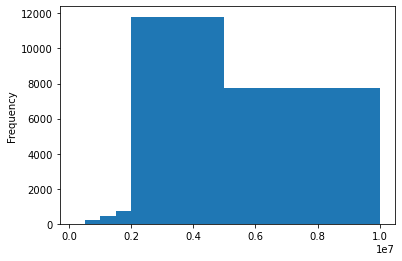

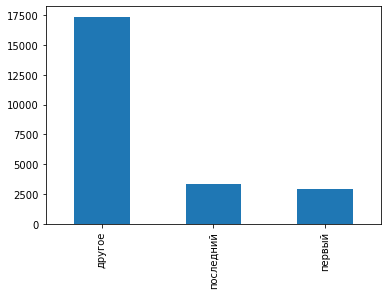

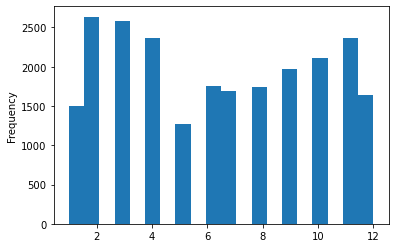

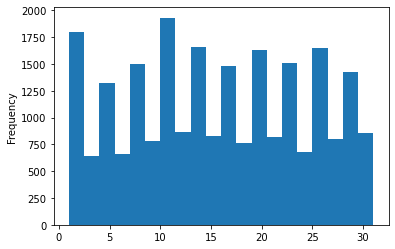

In [47]:
dataset['last_price'].plot(kind='hist', bins=[200000,250000,500000,1000000,1500000,2000000,5000000,10000000])
plt.show()
dataset['type_of_floor'].value_counts().plot(kind='bar')
plt.show()
dataset['month_of_exposition'].plot(kind='hist', y='month', bins=20)
plt.show()
dataset['day'] = pd.DatetimeIndex(dataset['first_day_exposition']).day
dataset['day'].plot(kind='hist', y='day', bins=20)
plt.show()

#### Выводы по графику:
 - пик общей  площади(total area) приходиться на примерно 50
  - пик жилой площади(living area) приходиться на примерное 25
  - значение общего кол-ва этажей (floors_total) не превосходит 30. Самое распространенное кол-во этаэей в квартире -5-6
  - пик площади кухни приходитя на 10
   - last_price - На графике, построенном с другими корзинами,можно заметить что явный пик находится на 5 миллионах рублей.
  - Почти одинаково распространены однокомнотные и двухкомнатные квартиры. Но больше все-таки 1. После таких квартир, остальные, с кол-вом комнат 4, 5 и тд все меньше и меньше.
  - В основном распространена высота потолков 2.5 метра(ceiling height)
  - Пик этажа квартиры находиться на 2,3 этажах.Такие квартиры больше всего распространены Реже всего встречается квартиры на 25 этаже и выше.
 - Пик расстояния до центра при ходится примрно на 15000 метрах. Далее, кол-во квартир идет на спад.
  - Естественно, кол-во "других" этажей большей, чем первых и последних)
  - Нормальное распределение можно четко заметить на значениях total_area,Total_images,floor,first_day_exposition,airports_nearest,cityCentre_nearest,parks_nearest,ponds_nearest,cityCentre_km
    - Примерно в феврале и примерно 12 числа был пик выставления квартир на продажу.

### Изучим, как быстро продавались квартиры (столбец days_exposition).

95.0

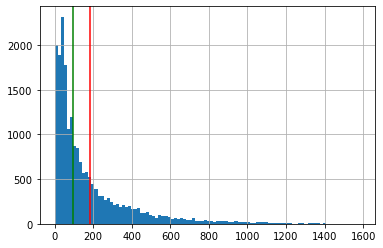

In [48]:
dataset['days_exposition'].hist(bins = 100)
days_exposion_median = dataset['days_exposition'].median()
days_exposion_mean = dataset['days_exposition'].mean()
plt.axvline(x=days_exposion_median,color='green')
plt.axvline(x=days_exposion_mean,color='red')
display(days_exposion_median)

Среднее кол-во дней продажи - 95 дней. Поэтому, все, что меньше этого значения является можно считать быстрыми продажами.Их большое кол-во как можно заметить по гарфику. Редки случаи, где кол-во дней составляет от 800 дней и больше. Самые редкие те, что больше 1000.Они являются необычно долгими

### Выясним, какие факторы больше всего влияют на общую (полную) стоимость объекта?

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

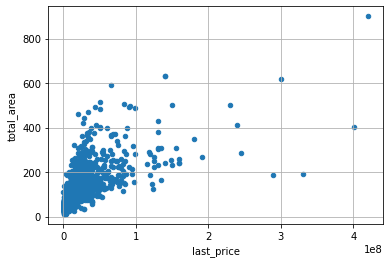

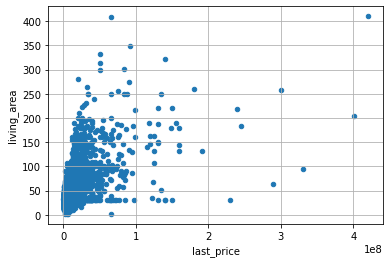

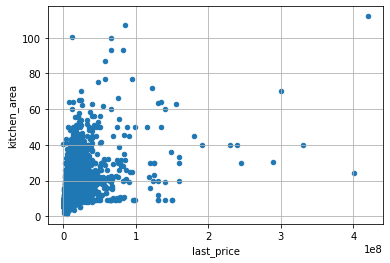

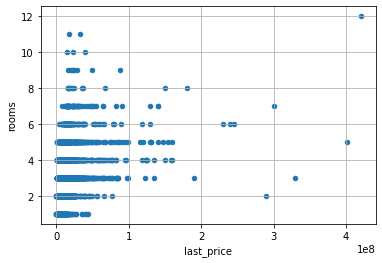

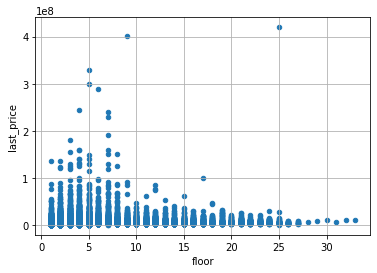

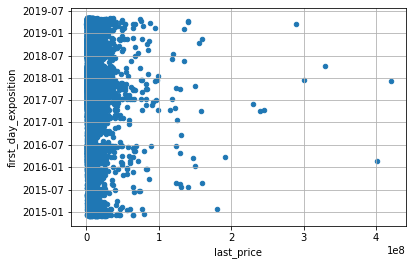

In [49]:
dataset.plot.scatter(x = 'last_price',y = 'total_area',grid = True)
dataset.plot.scatter(x = 'last_price',y = 'living_area',grid = True)
dataset.plot.scatter(x = 'last_price',y = 'kitchen_area',grid = True)
dataset.plot.scatter(x = 'last_price',y = 'rooms',grid = True)
dataset.plot.scatter(x = 'floor',y = 'last_price',grid = True)
dataset.plot.scatter(x = 'last_price',y = 'first_day_exposition',grid = True)

По построенным графикам можно сделать выводы о том, что цена:
 - достаточно сильно зависит от общей, жилой площади, а также площади кухни
  - сильно зависит от кол-ва комнат, этажа
   - не очень сильно зависит от даты размещения

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [50]:
df = dataset.pivot_table(index='locality_name',values='one_price',aggfunc=['count','mean'])
display(df.sort_values(by=df.columns[0],ascending=False).head(10))
dataset_max = dataset['one_price'].max()
dataset_min = dataset['one_price'].min()
print('Самая высокая цена за кв метр:',dataset.query('one_price==@dataset_max')['locality_name'])
print('Самая низкая цена за кв метр:',dataset.query('one_price==@dataset_min')['locality_name'])

,count,mean
,one_price,one_price
locality_name,,
Санкт-Петербург,15650,114754.332222
Мурино,586,86041.116064
Кудрово,470,95260.846171
Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458


Самая высокая цена за кв метр: 1436    Санкт-Петербург
Name: locality_name, dtype: object
Самая низкая цена за кв метр: 8793    Санкт-Петербург
Name: locality_name, dtype: object


### Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

<AxesSubplot:xlabel='cityCentre_km'>

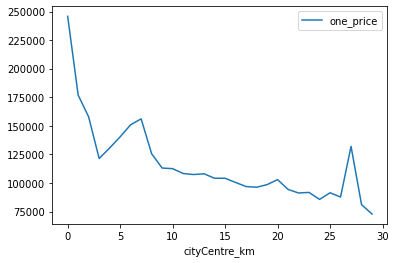

In [51]:
dataset.query('locality_name=="Санкт-Петербург"').pivot_table(index='cityCentre_km',values='one_price',aggfunc='mean').plot()

Вывод: чем дальше от цента, тем дешевле.С самого начала можно заметить резкий спад с увеличением кол-ва км, и на 3 км достигает пикового значения. Далее цена начинает немного подниматься и , после 6-7 км цена начинает плавно спадать.

### Общий вывод

Была проведена предобработка данных. Это немалая работа по очищению лишних, аномальных(например ceiling_height), пропущенных данных и дубликатов или, также по замене их на другие данные, опираясь на просмотр и наблюдение за данными. Также было проведено иследнование данных. Тут  было важно внимательно изучить графики, пики, распределение а также найти зависимоти и сделать логические выводы. Было выяснено, что все-таки цена очень сильно зависит от расположения(кол-во ближайших парков и прудов), кол-ва комнат, этажа и конечно же, очень сильно зависит от расположения к центру.Удивительно, что немало квартир находится рядом с прудами(пик в 400м) и рядом с парками(пик в 500м). А проанализировав цены за километр можно сказать что, 2-3км- это центр.